<a href="https://colab.research.google.com/github/albertopolini/DSIM/blob/main/DSIM_E01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("Hello world")

Hello world


In [3]:
import IPython.display as ipd

from matplotlib import pyplot as plt 

In [4]:
from scipy.io import wavfile as wav
from scipy.fft import rfft, fft, irfft, ifft, fftfreq
from scipy.signal import fftconvolve

import numpy as np

# Basic i/o

In [5]:
# 1: Sampling rate
# 2: Audio track
hello_rate, hello = wav.read('audio/hello.wav')

In [6]:
hello_rate

22050

In [11]:
hello.shape

# (18859,2), 2 => left audio and right audio

(18859, 2)

In [12]:
hello = hello[:,0]

In [13]:
hello.shape

(18859,)

### Play the track

In [16]:
ipd.Audio(hello, rate=hello_rate)

In [17]:
ipd.Audio(hello, rate=hello_rate // 2)

### Save the track

In [20]:
wav.write('audio/hello_slow.wav', rate=hello_rate // 2, data=hello)

# Plot the audio track

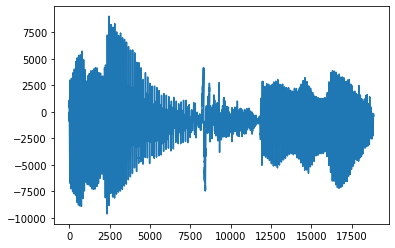

In [23]:
plt.plot(hello)

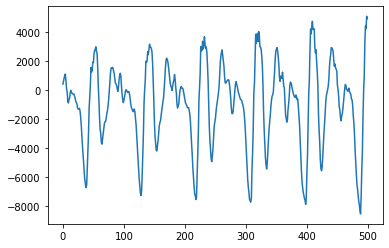

In [24]:
plt.plot(hello[0:500])

# Importing and visualizing "whistle" and "voice"

In [25]:
whistle_rate, whistle = wav.read('audio/whistle.wav')

In [26]:
voice_rate, voice = wav.read('audio/voice.wav')

In [29]:
ipd.Audio(whistle, rate=whistle_rate)

In [30]:
ipd.Audio(voice, rate=voice_rate)

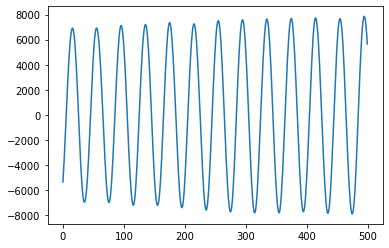

In [33]:
plt.plot(whistle[40000:40500])

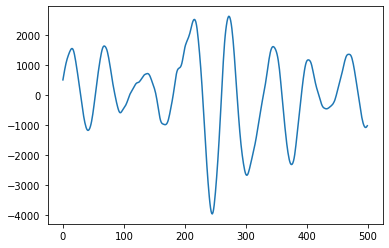

In [35]:
plt.plot(voice[40000:40500])

# Fourier Analysis

Changing the domain of the signal from time to frequencies

In [36]:
voice_fft = fft(voice)

In [40]:
voice_fft.shape, voice.shape

# The number of information doesn't change

((120768,), (120768,))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


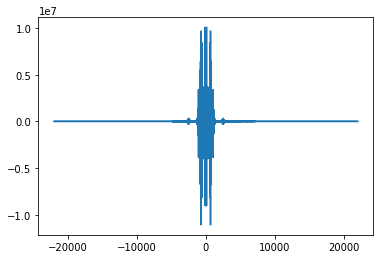

In [44]:
voice_freqs = fftfreq(len(voice),1.0/voice_rate)
plt.plot(voice_freqs, voice_fft)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


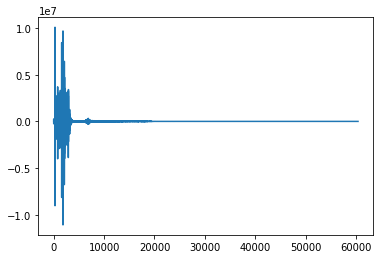

In [45]:
voice_ft = rfft(voice)
plt.plot(voice_ft)

## Visualize the first 10000 elements of the fourier transform of voice and whistle


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


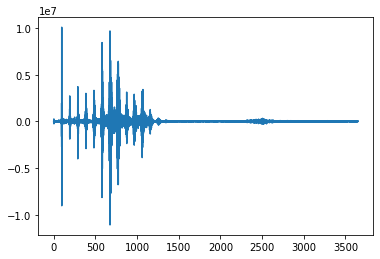

In [47]:
voice_freqs = fftfreq(len(voice),1.0/voice_rate)
voice_ft = rfft(voice)
plt.plot(voice_freqs[0:10000],voice_ft[0:10000])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


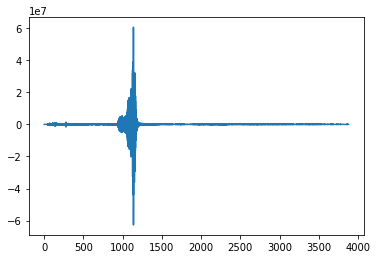

In [49]:
whistle_freqs = fftfreq(len(whistle),1.0/whistle_rate)
whistle_ft = rfft(whistle)
plt.plot(whistle_freqs[0:10000],whistle_ft[0:10000])

# Low pass / high pass filtering

### Low pass filter

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


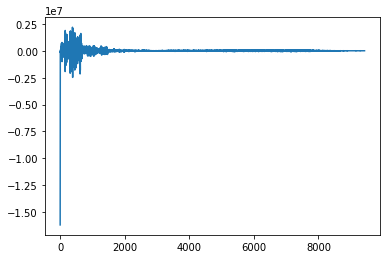

In [50]:
hello_ft = rfft(hello)
plt.plot(hello_ft)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


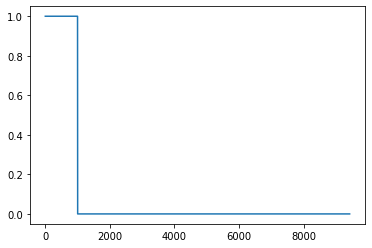

In [52]:
lp = hello_ft*0
lp[0:1000] = 1
plt.plot(lp)

In [54]:
hello_ft_lp = hello_ft * lp

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


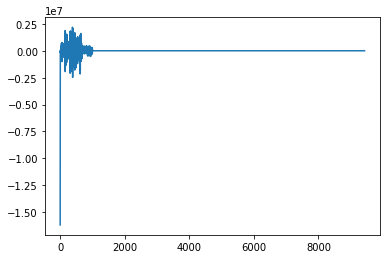

In [55]:
plt.plot(hello_ft_lp)

In [69]:
hello_lp = irfft(hello_ft_lp)

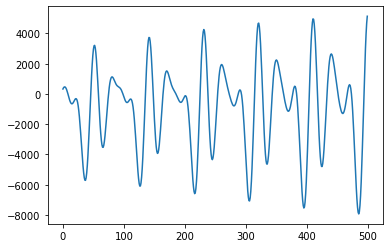

In [70]:
plt.plot(hello_lp[0:500])

In [71]:
ipd.Audio(data=hello_lp, rate=hello_rate)

### High pass filter

In [75]:
hello_ft_hp = hello_ft * (1-lp)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


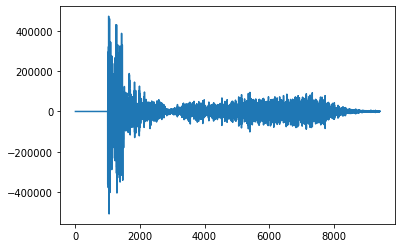

In [76]:
plt.plot(hello_ft_hp)

In [77]:
hello_hp = irfft(hello_ft_hp)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


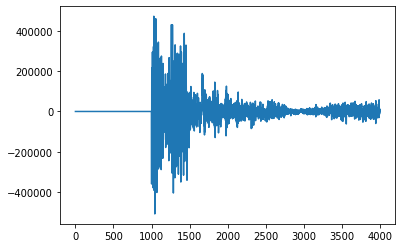

In [78]:
plt.plot(hello_ft_hp[0:4000])

In [79]:
ipd.Audio(data=hello_hp, rate=hello_rate)

# Convolution

In [88]:
violin_r, violin = wav.read('audio/violin.wav')
violin = violin[0: violin_r*2]

In [89]:
ipd.Audio(violin, rate = violin_r)

In [84]:
bang1_r, bang1 = wav.read('audio/bang1.wav')

In [90]:
bang2_r, bang2 = wav.read('audio/bang2.wav')
bang2 = bang2[0:bang2_r*2]

In [86]:
ipd.Audio(bang1, rate = bang1_r)

In [93]:
ipd.Audio(bang2, rate = bang2_r)

In [91]:
conv1 = fftconvolve(bang1, violin)
ipd.Audio(conv1, rate=violin_r)

In [92]:
conv2 = fftconvolve(bang2, violin)
ipd.Audio(conv2, rate=violin_r)